In [1]:
from requests.auth import HTTPBasicAuth
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import matplotlib.pyplot as plt
import requests, json, os
from dotenv import load_dotenv
import pandas as pd

In [2]:
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

#create a file envViewer.txt with 
#USER='XXXX'
#PASSWORD='XXXX'
load_dotenv('envViewer.txt')
user = os.getenv('ISTSOSUSER')
password = os.getenv('ISTSOSPASSWORD')

auth = HTTPBasicAuth(user, password)

In [3]:
url = 'https://apps.hatarilabs.com/istsos'
service = 'temperature'
procedure = 'genericSensor'
off = 'tempnetwork'

In [4]:
beginTime = "2023-06-01T00:00:00-05:00"
endTime = "2023-06-02T20:00:00-05:00"
# Preparing "io" object to send
observedProperties = requests.get(
    '%s/wa/istsos/services/%s/operations/getobservation/offerings/'
    '%s/procedures/%s/observedproperties/:/eventtime/%s/%s' % (
        url, service, off, procedure,beginTime,endTime),
    params={
        "qualityIndex": "False"
    }, auth=auth)

In [5]:
observedList = observedProperties.json()['data'][0]['result']['DataArray']['values']

In [6]:
observedList[:5]

[['2023-06-01T10:49:04.650563-05:00', 23.625],
 ['2023-06-01T10:50:04.170496-05:00', 23.625],
 ['2023-06-01T10:51:05.050523-05:00', 30.5],
 ['2023-06-01T10:52:04.490570-05:00', 29.125],
 ['2023-06-01T10:53:04.810532-05:00', 28.0]]

In [7]:
observedDf = pd.DataFrame(columns=['Date','Temp'])
observedDf

Empty DataFrame
Columns: [Date, Temp]
Index: []

In [8]:
observedDf['Date'] = pd.to_datetime([i[0] for i in observedList])
observedDf['Temp'] = [i[1] for i in observedList]
observedDf = observedDf.set_index('Date')
observedDf.head()

Temp
Date                                    
2023-06-01 10:49:04.650563-05:00  23.625
2023-06-01 10:50:04.170496-05:00  23.625
2023-06-01 10:51:05.050523-05:00  30.500
2023-06-01 10:52:04.490570-05:00  29.125
2023-06-01 10:53:04.810532-05:00  28.000

<Axes: xlabel='Date'>

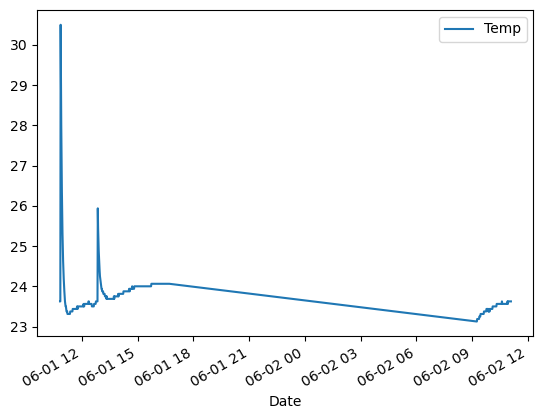

In [9]:
observedDf.plot()